In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 210
df = pd.read_csv(r"C:\Users\vigne\StressDetection-master\Book1.csv")
df.info()
def str_to_list(s):
    return eval(s)
def convert_to_list(id_array):
    return list(id_array)
df['left_eye'] = df['left_eye'].apply(str_to_list)
df['right_eye'] = df['right_eye'].apply(str_to_list)
df['concatenated'] = df['left_eye'] + df['right_eye']
df['concatenated'] = df['concatenated'].apply(lambda x: pad_sequences([x], maxlen=max_length, padding='post')[0])
df['concatenated'] = df['concatenated'].apply(convert_to_list)
X = np.array(df['concatenated'].tolist())
y = df['stress']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   left_eye   100 non-null    object
 1   right_eye  100 non-null    object
 2   stress     100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [59]:
print(X.shape)
print(y.shape)

(100, 210)
(100,)


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'train Accuracy: {accuracy}')
y_pred = svc_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'test Accuracy: {accuracy}')

train Accuracy: 1.0
test Accuracy: 0.9


In [98]:
# import joblib
# joblib.dump(svc_classifier, 'svc.pkl')
import joblib
loaded_model = joblib.load('svc.pkl')

['svc.pkl']

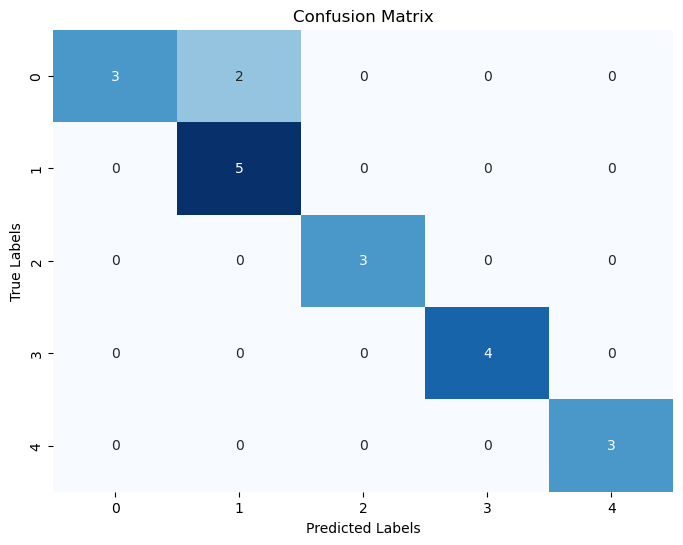

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3

    accuracy                           0.90        20
   macro avg       0.94      0.92      0.92        20
weighted avg       0.93      0.90      0.90        20



In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

In [95]:
data=[0, 0, 0, 0, 3, 4, 5, 6, 6, 5, 9, 2, 0, 0, 0, 0, 0, 0, 1, 7, 5, 4, 4, 5, 7, 8, 10, 13, 0, 0, 0, 0, 0, 22, 10, 5, 4, 3, 5, 10, 14, 21, 23, 17, 2, 0, 11, 30, 35, 22, 6, 3, 2, 5, 13, 18, 33, 42, 32, 15, 2, 19, 28, 33, 37, 17, 5, 3, 2, 10, 27, 51, 57, 41, 6, 14, 16, 20, 25, 36, 28, 13, 9, 6, 19, 45, 50, 37, 0, 0, 0, 0, 0, 23, 24, 24, 19, 17, 19, 29, 38, 6, 0, 0, 0, 0, 0, 0, 1, 4, 5, 7, 8, 8, 6, 1, 0, 0, 0, 0, 0, 0, 6, 7, 6, 3, 5, 8, 7, 12, 18, 8, 0, 0, 0, 2, 15, 34, 11, 8, 5, 5, 7, 8, 24, 30, 21, 5, 0, 0, 23, 46, 54, 25, 14, 6, 4, 8, 19, 34, 30, 23, 15, 7, 1, 14, 35, 51, 37, 20, 9, 8, 15, 27, 33, 27, 20, 17, 15, 13, 0, 6, 10, 35, 27, 18, 16, 19, 25, 24, 22, 20, 21, 12, 4, 0, 0, 0, 2, 24, 22, 21, 19, 21, 21, 16, 1, 2, 1, 0]
import joblib
loaded_model = joblib.load('svc.pkl')
X_single_input = np.array([data])
y_single_pred = svc_classifier.predict(X_single_input)
print(f'Prediction for single input instance: {y_single_pred}')

Prediction for single input instance: [1]
